In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
import seaborn as sns

### Loading data

In [73]:
wine=pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\pca\\wine.csv")

In [74]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Checking for null values

In [75]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Checking for duplicated values

In [76]:
wine[wine.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


### There are no duplicate values

### Removing the type column

In [77]:
wine_mod=wine.drop(['Type'],axis=1)

### Standard scaler

In [78]:
ss=StandardScaler()
x=ss.fit_transform(wine_mod)

In [79]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### Transforming data with PCA

In [80]:
pca=PCA()

In [81]:
pca_values=pca.fit_transform(x)

In [82]:
var=np.cumsum(pca.explained_variance_ratio_)
var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

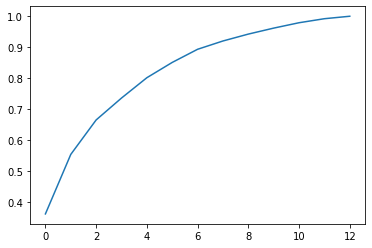

In [83]:
plt.plot(var)

C:\Users\Govind S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

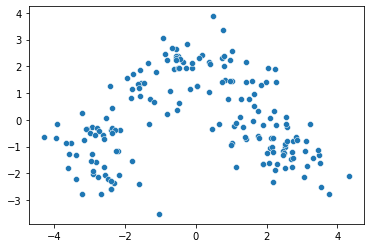

In [84]:
x = pca_values[:,0]
y = pca_values[:,1]
z = pca_values[:,2]
sns.scatterplot(x,y)

C:\Users\Govind S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

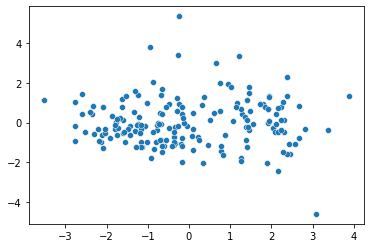

In [85]:
sns.scatterplot(y,z)

C:\Users\Govind S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

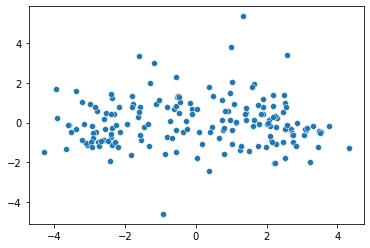

In [86]:
sns.scatterplot(x,z)

<function matplotlib.pyplot.show(close=None, block=None)>

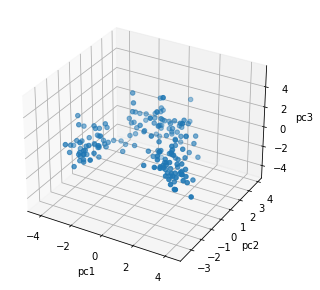

In [87]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(x,y,z)
axes.set_xlabel('pc1')
axes.set_ylabel('pc2')
axes.set_zlabel('pc3')
plt.show

### taking the first 3 components

In [88]:
pca_values[:,:3]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [89]:
wine_final=pd.DataFrame(pca_values[0:,:3],columns=['pc1','pc2','pc3'])

In [90]:
wine_final

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


## Hierarchical clustering

### Dendogram

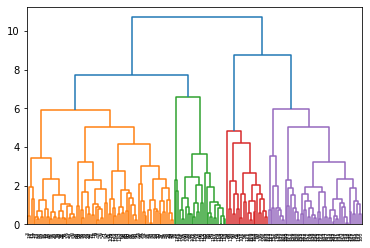

In [91]:
dendrogram = sch.dendrogram(sch.linkage(wine_final, method='complete'))

### For 3 clusters

In [92]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
a=hc.fit_predict(wine_final)
wine['cluster_id_hc']=pd.Series(a)
wine.cluster_id_hc.value_counts()

0    106
1     50
2     22
Name: cluster_id_hc, dtype: int64

In [93]:
wine.groupby('cluster_id_hc').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster_id_hc,,,,,,,,,,,,,,
0,1.443396,13.065000,1.993396,2.406509,18.758491,101.990566,2.632075,2.663019,0.319151,1.858491,4.438585,1.063302,3.038113,853.707547
1,2.940000,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,2.045455,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636


### For 4 clusters

In [94]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
a=hc.fit_predict(wine_final)
wine['cluster_id_hc']=pd.Series(a)
wine.cluster_id_hc.value_counts()

3    78
1    50
0    28
2    22
Name: cluster_id_hc, dtype: int64

In [95]:
wine.groupby('cluster_id_hc').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster_id_hc,,,,,,,,,,,,,,
0,1.964286,12.193929,2.023571,2.449286,22.453571,94.321429,2.129643,2.066786,0.422857,1.504643,2.934643,1.050000,2.814643,503.571429
1,2.940000,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,2.045455,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636
3,1.256410,13.377692,1.982564,2.391154,17.432051,104.743590,2.812436,2.877051,0.281923,1.985513,4.978462,1.068077,3.118333,979.397436


### For 5 clusters

In [96]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
a=hc.fit_predict(wine_final)
wine['cluster_id_hc']=pd.Series(a)
wine.cluster_id_hc.value_counts()

1    78
0    50
3    25
2    22
4     3
Name: cluster_id_hc, dtype: int64

In [97]:
wine.groupby('cluster_id_hc').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster_id_hc,,,,,,,,,,,,,,
0,2.940000,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
1,1.256410,13.377692,1.982564,2.391154,17.432051,104.743590,2.812436,2.877051,0.281923,1.985513,4.978462,1.068077,3.118333,979.397436
2,2.045455,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636
3,2.000000,12.153200,2.035600,2.381200,21.808000,90.360000,2.020800,1.888800,0.427600,1.455200,2.769600,1.041200,2.736800,472.800000
4,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000


### 4 clusters seems to work best

## K-Means clustering

### Elbow Graph

C:\Users\Govind S\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1539.5034801883075, 886.1611364823502, 512.999506766152, 429.8030732473653, 371.02394449456744, 326.2768904959661, 291.5270134908596, 261.6843759885969, 239.0446194906035, 213.23994073321188]


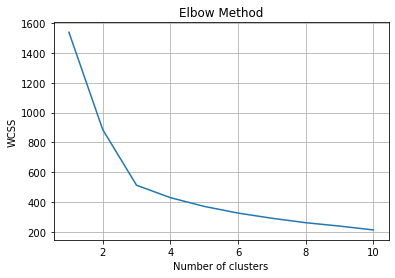

In [98]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_final)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.grid()
plt.show()

### At 3 clusters the steepness of the graph decreases

In [99]:
    kmeans = KMeans(n_clusters=3,random_state=0)
    kmeans.fit(wine_final)

KMeans(n_clusters=3, random_state=0)

In [100]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [101]:
wine['cluster_id_kmeans']=pd.Series(kmeans.labels_)
wine.cluster_id_kmeans.value_counts()

1    64
2    63
0    51
Name: cluster_id_kmeans, dtype: int64

In [102]:
wine.groupby('cluster_id_kmeans').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id_hc
cluster_id_kmeans,,,,,,,,,,,,,,,
0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,0.117647
1,2.000000,12.249062,1.910313,2.233281,20.087500,92.812500,2.227813,2.023438,0.359531,1.619063,2.949219,1.063063,2.803906,507.828125,2.046875
2,1.063492,13.656032,1.983175,2.460476,17.479365,107.650794,2.858254,3.015079,0.291270,1.922540,5.438413,1.065079,3.157143,1093.238095,1.142857


In [103]:
wine.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [104]:
wine.groupby('Type').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id_hc,cluster_id_kmeans
Type,,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,1.050847,2.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,2.042254,1.014085
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.041667,0.000000


### In the original data, the number of clusters was 3. With k means clustering, we got the ideal number of clusters to be 3. 

### But with hierarchial clustering we got the ideal number of clusters to be 4

### Plotting clustered data

In [105]:
wine_final['cluster_id_hc']=wine['cluster_id_hc']
wine_final['cluster_id_kmeans']=wine['cluster_id_kmeans']
wine_final['Type']=wine['Type']

### k means clustering

<function matplotlib.pyplot.show(close=None, block=None)>

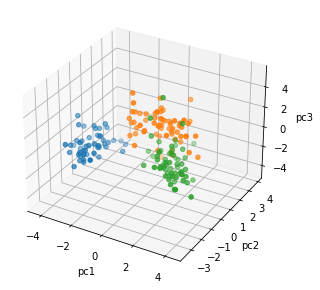

In [106]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(wine_final[wine_final['cluster_id_kmeans']==0].pc1,wine_final[wine_final['cluster_id_kmeans']==0].pc2,wine_final[wine_final['cluster_id_kmeans']==0].pc3,'c1')
axes.scatter3D(wine_final[wine_final['cluster_id_kmeans']==1].pc1,wine_final[wine_final['cluster_id_kmeans']==1].pc2,wine_final[wine_final['cluster_id_kmeans']==1].pc3,'c2')
axes.scatter3D(wine_final[wine_final['cluster_id_kmeans']==2].pc1,wine_final[wine_final['cluster_id_kmeans']==2].pc2,wine_final[wine_final['cluster_id_kmeans']==2].pc3,'c3')
axes.set_xlabel('pc1')
axes.set_ylabel('pc2')
axes.set_zlabel('pc3')

plt.show

### hierarchical clustering

<function matplotlib.pyplot.show(close=None, block=None)>

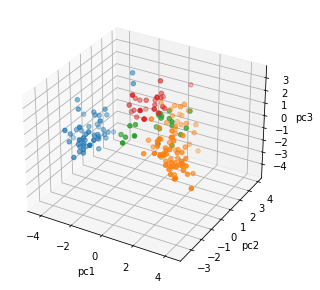

In [107]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(wine_final[wine_final['cluster_id_hc']==0].pc1,wine_final[wine_final['cluster_id_hc']==0].pc2,wine_final[wine_final['cluster_id_hc']==0].pc3,'c1')
axes.scatter3D(wine_final[wine_final['cluster_id_hc']==1].pc1,wine_final[wine_final['cluster_id_hc']==1].pc2,wine_final[wine_final['cluster_id_hc']==1].pc3,'c2')
axes.scatter3D(wine_final[wine_final['cluster_id_hc']==2].pc1,wine_final[wine_final['cluster_id_hc']==2].pc2,wine_final[wine_final['cluster_id_hc']==2].pc3,'c3')
axes.scatter3D(wine_final[wine_final['cluster_id_hc']==3].pc1,wine_final[wine_final['cluster_id_hc']==3].pc2,wine_final[wine_final['cluster_id_hc']==3].pc3,'c4')
axes.set_xlabel('pc1')
axes.set_ylabel('pc2')
axes.set_zlabel('pc3')

plt.show

### the data is plotted with the given 'Type' column

<function matplotlib.pyplot.show(close=None, block=None)>

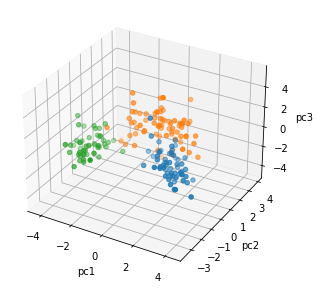

In [108]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(wine_final[wine_final['Type']==1].pc1,wine_final[wine_final['Type']==1].pc2,wine_final[wine_final['Type']==1].pc3,'c1')
axes.scatter3D(wine_final[wine_final['Type']==2].pc1,wine_final[wine_final['Type']==2].pc2,wine_final[wine_final['Type']==2].pc3,'c2')
axes.scatter3D(wine_final[wine_final['Type']==3].pc1,wine_final[wine_final['Type']==3].pc2,wine_final[wine_final['Type']==3].pc3,'c3')
axes.set_xlabel('pc1')
axes.set_ylabel('pc2')
axes.set_zlabel('pc3')

plt.show